#### Objective: To build a linear regression model to predict “median_val” of house in california

##### Step 1: Import necessary packages

In [1]:
# pip install folium

In [2]:
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

##### Step 2: Load the shapefile data using GeoPandas and map using Folium
Print the first 10 records, and visualize any 500 data records on an interactive map using the Folium library.

In [3]:
housing = gpd.read_file("./data/3_predictionML/california_housing.shp")
housing.head(10)

,total_room,total_bedr,population,households,median_inc,ocean_prox,house_age,median_val,geometry
0,880.0,129.0,322.0,126.0,83252.0,NEAR BAY,41.0,452600.0,POINT (-122.23000 37.88000)
1,7099.0,1106.0,2401.0,1138.0,83014.0,NEAR BAY,21.0,358500.0,POINT (-122.22000 37.86000)
2,1467.0,190.0,496.0,177.0,72574.0,NEAR BAY,52.0,352100.0,POINT (-122.24000 37.85000)
3,1274.0,235.0,558.0,219.0,56431.0,NEAR BAY,52.0,341300.0,POINT (-122.25000 37.85000)
4,1627.0,280.0,565.0,259.0,38462.0,NEAR BAY,52.0,342200.0,POINT (-122.25000 37.85000)
5,919.0,213.0,413.0,193.0,40368.0,NEAR BAY,52.0,269700.0,POINT (-122.25000 37.85000)
6,2535.0,489.0,1094.0,514.0,36591.0,NEAR BAY,52.0,299200.0,POINT (-122.25000 37.84000)
7,3104.0,687.0,1157.0,647.0,31200.0,NEAR BAY,52.0,241400.0,POINT (-122.25000 37.84000)
8,2555.0,665.0,1206.0,595.0,20804.0,NEAR BAY,42.0,226700.0,POINT (-122.26000 37.84000)
9,3549.0,707.0,1551.0,714.0,36912.0,NEAR BAY,52.0,261100.0,POINT (-122.25000 37.84000)


In [4]:
# Randomly select 500 observations
selected_data = housing.sample(n=500, random_state=1234)

# Create a Folium map centered at a specific location
m = folium.Map(location=[selected_data['geometry'].y.mean(), selected_data['geometry'].x.mean()], zoom_start=5)

# Add markers for the selected data points
for index, row in selected_data.iterrows():
    # Get the geometry coordinates
    lat, lon = row.geometry.y, row.geometry.x

    # Customize the circle style by adjusting the radius, color, and border attributes

    circle_radius = 2  # Adjust the radius as needed
    circle_color = 'green'  # Adjust the color as needed
    folium.Circle(location=[lat, lon], radius=circle_radius, color=circle_color, fill=True).add_to(m)
      
m

##### Step 3: Data preparation to feed into regression

array([[<Axes: title={'center': 'total_room'}>,
        <Axes: title={'center': 'total_bedr'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_inc'}>,
        <Axes: title={'center': 'house_age'}>],
       [<Axes: title={'center': 'median_val'}>, <Axes: >, <Axes: >]],
      dtype=object)

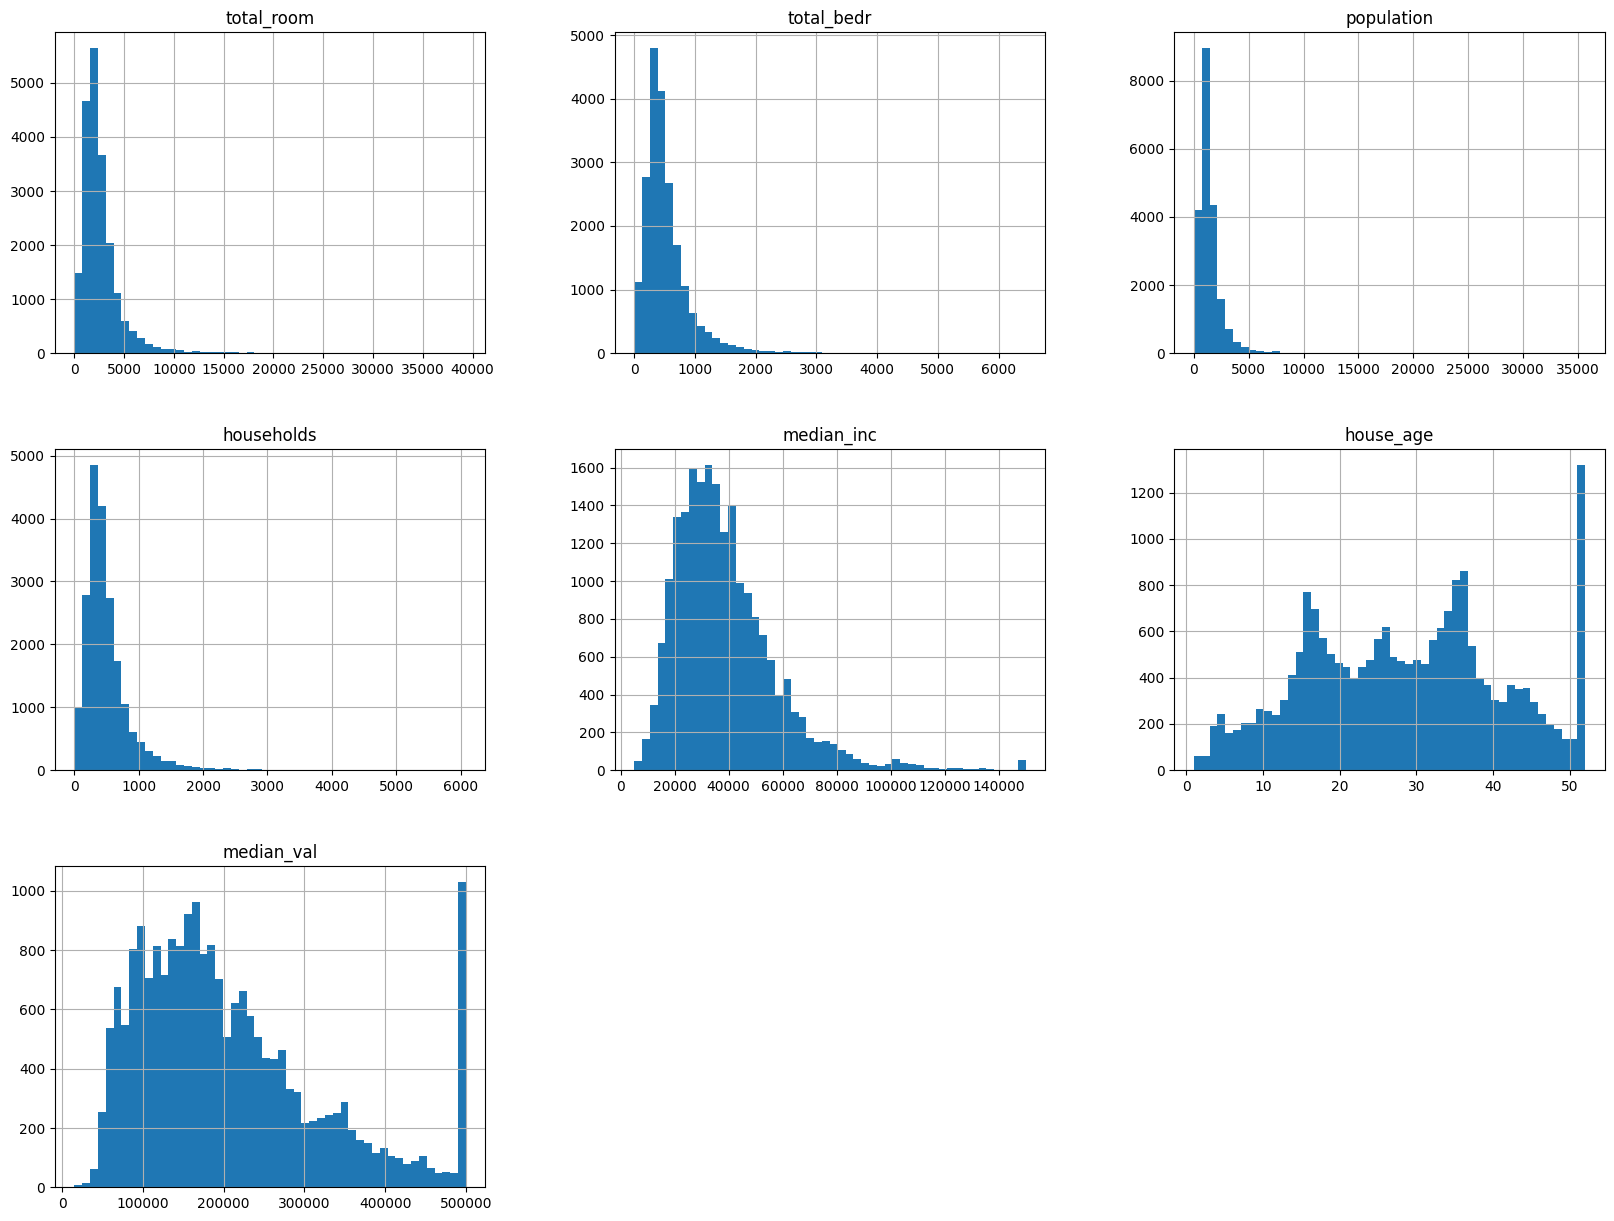

In [5]:
housing.hist(bins=50, figsize=(20,15))

###### Remove outliers

In [6]:
housing["house_age"].max()

52.0

In [7]:
housing_cleaned = housing[(housing["house_age"] < housing["house_age"].max()) & (housing["median_val"] < 500000.0)]

array([[<Axes: title={'center': 'total_room'}>,
        <Axes: title={'center': 'total_bedr'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_inc'}>,
        <Axes: title={'center': 'house_age'}>],
       [<Axes: title={'center': 'median_val'}>, <Axes: >, <Axes: >]],
      dtype=object)

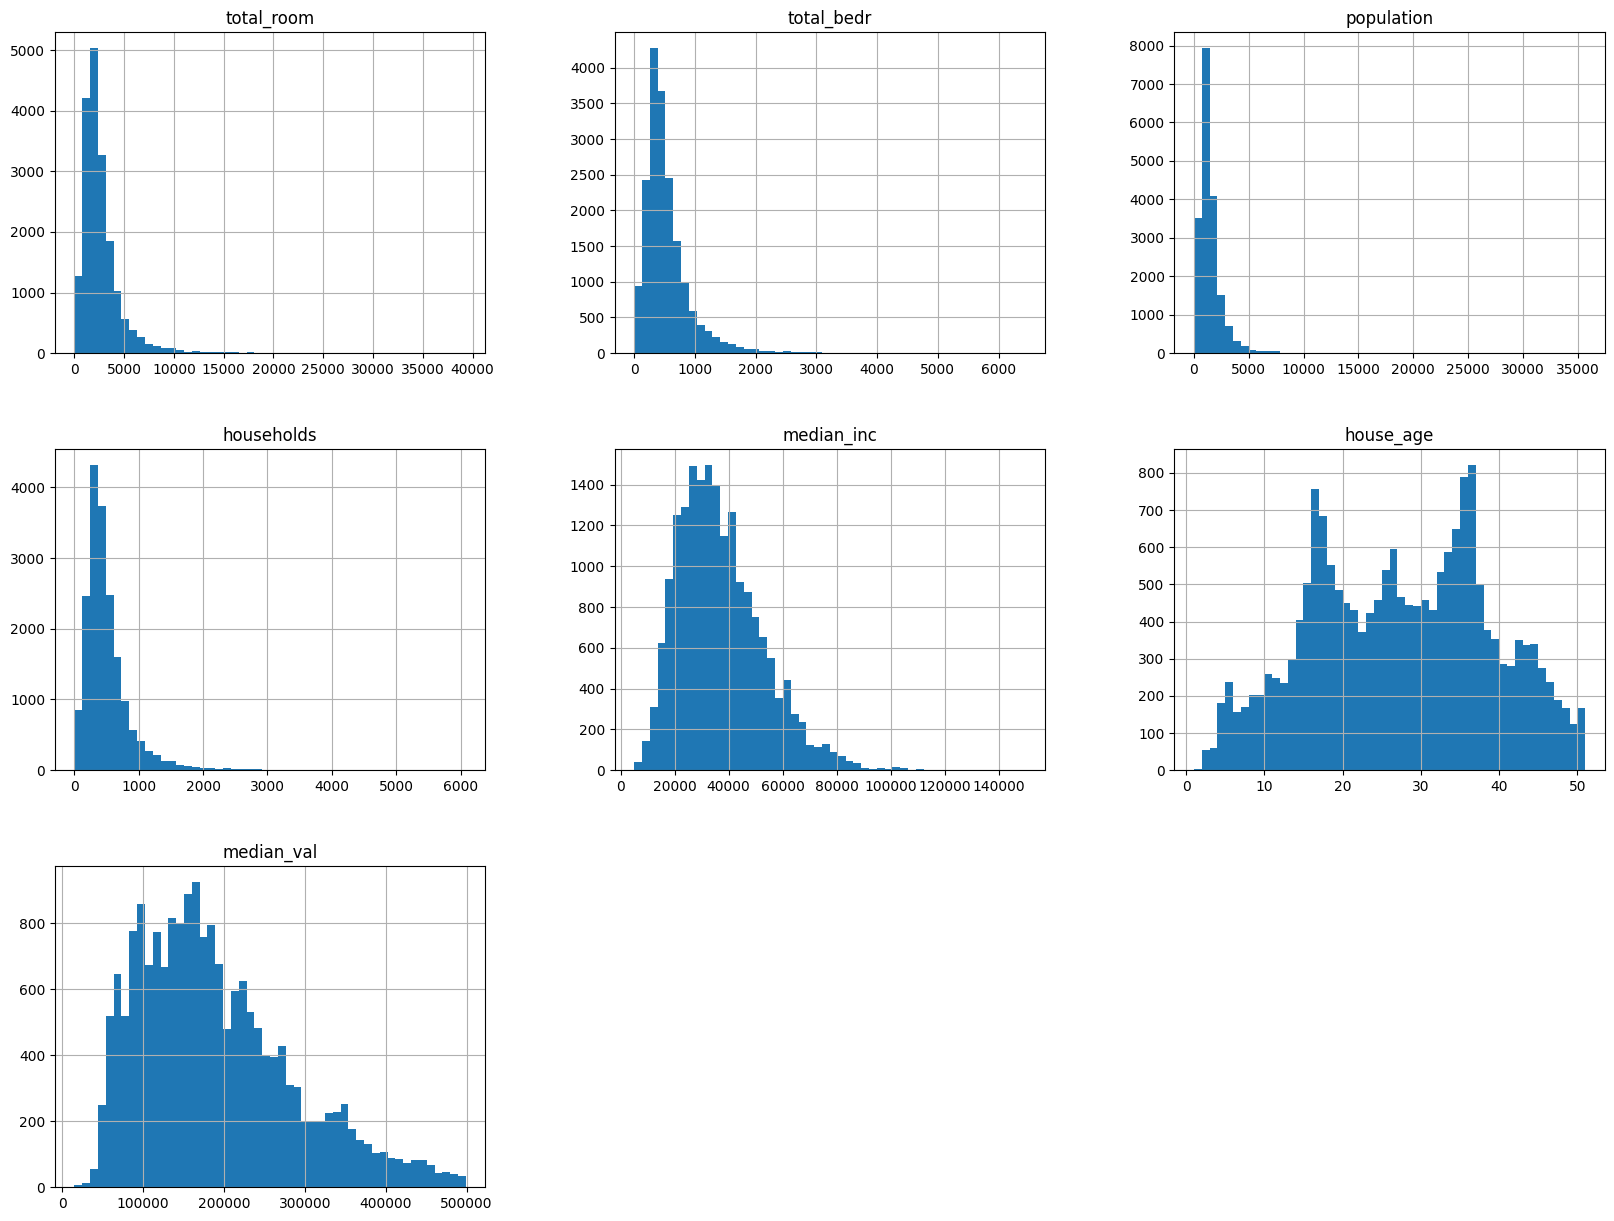

In [8]:
housing_cleaned.hist(bins=50, figsize=(20,15))

In [9]:
housing_cleaned.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_room,18555.0,2669.191215,2224.431894,2.0,1455.0,2142.0,3184.0,39320.0
total_bedr,18555.0,542.270224,430.854212,0.0,296.0,438.0,654.5,6445.0
population,18555.0,1470.684398,1163.197359,3.0,811.0,1203.0,1781.0,35682.0
households,18555.0,508.700781,389.623630,2.0,284.0,416.0,614.0,6082.0
median_inc,18555.0,36931.936621,15701.952766,4999.0,25372.5,34659.0,46161.0,150001.0
house_age,18555.0,26.981299,11.434147,1.0,17.0,27.0,36.0,51.0
median_val,18555.0,189323.228079,95372.017846,14999.0,115400.0,171100.0,243100.0,499100.0


In [10]:
housing_cleaned["ocean_prox"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [11]:
housing_cleaned = housing_cleaned.drop(columns='geometry')

###### Get dummy variables for categorical features

In [12]:
housing_cleaned = pd.get_dummies(housing_cleaned)
housing_cleaned.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_room,18555.0,2669.191215,2224.431894,2.0,1455.0,2142.0,3184.0,39320.0
total_bedr,18555.0,542.270224,430.854212,0.0,296.0,438.0,654.5,6445.0
population,18555.0,1470.684398,1163.197359,3.0,811.0,1203.0,1781.0,35682.0
households,18555.0,508.700781,389.623630,2.0,284.0,416.0,614.0,6082.0
median_inc,18555.0,36931.936621,15701.952766,4999.0,25372.5,34659.0,46161.0,150001.0
house_age,18555.0,26.981299,11.434147,1.0,17.0,27.0,36.0,51.0
median_val,18555.0,189323.228079,95372.017846,14999.0,115400.0,171100.0,243100.0,499100.0


##### Step 4: Split the data into training and test

In [13]:
housing_cleaned

,total_room,total_bedr,population,households,median_inc,house_age,median_val,ocean_prox_<1H OCEAN,ocean_prox_INLAND,ocean_prox_ISLAND,ocean_prox_NEAR BAY,ocean_prox_NEAR OCEAN
0,880.0,129.0,322.0,126.0,83252.0,41.0,452600.0,False,False,False,True,False
1,7099.0,1106.0,2401.0,1138.0,83014.0,21.0,358500.0,False,False,False,True,False
8,2555.0,665.0,1206.0,595.0,20804.0,42.0,226700.0,False,False,False,True,False
15,1120.0,283.0,697.0,264.0,21250.0,50.0,140000.0,False,False,False,True,False
18,2239.0,455.0,990.0,419.0,19911.0,50.0,158700.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,1665.0,374.0,845.0,330.0,15603.0,25.0,78100.0,False,True,False,False,False
20636,697.0,150.0,356.0,114.0,25568.0,18.0,77100.0,False,True,False,False,False
20637,2254.0,485.0,1007.0,433.0,17000.0,17.0,92300.0,False,True,False,False,False
20638,1860.0,409.0,741.0,349.0,18672.0,18.0,84700.0,False,True,False,False,False


In [14]:
# X should contain the features, and y should contain the target variable
X = housing_cleaned.drop('median_val', axis=1)
y = housing_cleaned['median_val']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

##### Step 5: Training the model

In [16]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test_scaled)

##### Step 6: Evaluate the performance of the trained model on test data using RMSE.

In [18]:
rmse = mean_squared_error(y_test, y_pred,squared = False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Root Mean Squared Error: 60042.08975030024
Mean Absolute Error: 44202.17875634061
R-squared: 0.6042277999956008


In [19]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (3711, 11)
y_test shape: (3711,)


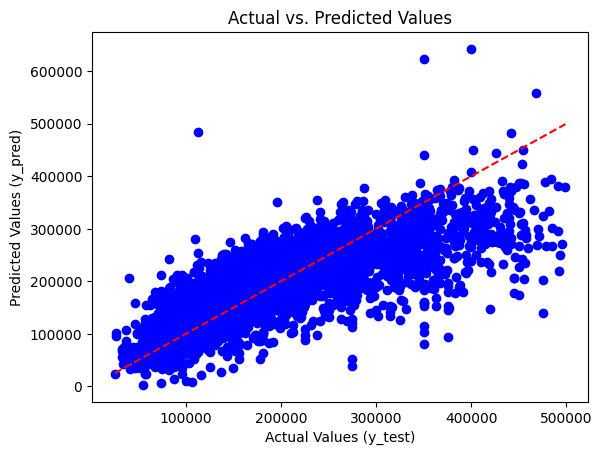

In [20]:
# Create a scatter plot of actual vs. predicted values and add a reference line
plt.scatter(y_test, y_pred, color='blue')

# Add a reference line for perfect prediction (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.show()

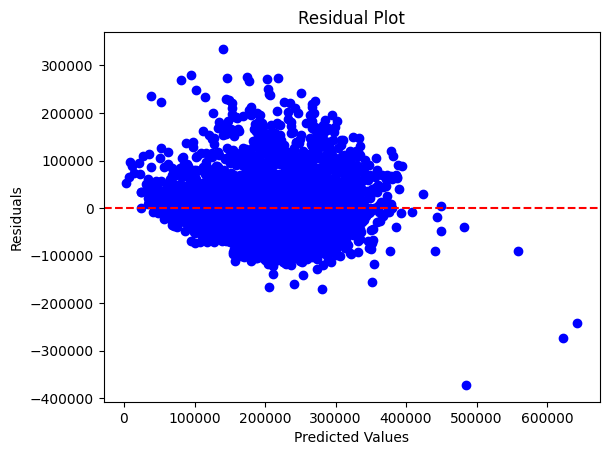

In [21]:
# Calculate the residuals
residuals = y_test - y_pred

# Create a scatter plot of residuals
plt.scatter(y_pred, residuals, color='blue')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='red', linestyle='--')
plt.show()